In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.ensemble import RandomForestRegressor, GradientBoostingClassifier

In [23]:
### 1. 载入Airbnb数据
data_path = 'boston-airbnb-open-data'

file_name_calendar = 'calendar.csv'
raw_data_calendar = pd.read_csv(data_path + '\\' + file_name_calendar)

file_name_listings = 'listings.csv'
raw_data_listings = pd.read_csv(data_path + '\\' + file_name_listings)

file_name_reviews = 'reviews.csv'
raw_data_reviews = pd.read_csv(data_path + '\\' + file_name_reviews)

## 1. 数据探索

In [24]:
# 查看三个数据集大小
print(raw_data_calendar.shape,raw_data_listings.shape,raw_data_reviews.shape)

(1308890, 4) (3585, 95) (68275, 6)


### 1.1 查看calendar数据

In [25]:
raw_data_calendar.head()

,listing_id,date,available,price
0,12147973,2017-09-05,f,NaN
1,12147973,2017-09-04,f,NaN
2,12147973,2017-09-03,f,NaN
3,12147973,2017-09-02,f,NaN
4,12147973,2017-09-01,f,NaN


In [26]:
raw_data_calendar.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1308890 entries, 0 to 1308889
Data columns (total 4 columns):
listing_id    1308890 non-null int64
date          1308890 non-null object
available     1308890 non-null object
price         643037 non-null object
dtypes: int64(1), object(3)
memory usage: 39.9+ MB


### 1.2 查看review数据

In [27]:
raw_data_reviews.head()

,listing_id,id,date,reviewer_id,reviewer_name,comments
0,1178162,4724140,2013-05-21,4298113,Olivier,My stay at islam's place was really cool! Good...
1,1178162,4869189,2013-05-29,6452964,Charlotte,Great location for both airport and city - gre...
2,1178162,5003196,2013-06-06,6449554,Sebastian,We really enjoyed our stay at Islams house. Fr...
3,1178162,5150351,2013-06-15,2215611,Marine,The room was nice and clean and so were the co...
4,1178162,5171140,2013-06-16,6848427,Andrew,Great location. Just 5 mins walk from the Airp...


### 1.3 查看listings数据

In [28]:
raw_data_listings.head()

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,12147973,https://www.airbnb.com/rooms/12147973,20160906204935,2016-09-07,Sunny Bungalow in the City,"Cozy, sunny, family home. Master bedroom high...",The house has an open and cozy feel at the sam...,"Cozy, sunny, family home. Master bedroom high...",none,"Roslindale is quiet, convenient and friendly. ...",...,NaN,f,NaN,NaN,f,moderate,f,f,1,NaN
1,3075044,https://www.airbnb.com/rooms/3075044,20160906204935,2016-09-07,Charming room in pet friendly apt,Charming and quiet room in a second floor 1910...,Small but cozy and quite room with a full size...,Charming and quiet room in a second floor 1910...,none,"The room is in Roslindale, a diverse and prima...",...,9.0,f,NaN,NaN,t,moderate,f,f,1,1.30
2,6976,https://www.airbnb.com/rooms/6976,20160906204935,2016-09-07,Mexican Folk Art Haven in Boston,"Come stay with a friendly, middle-aged guy in ...","Come stay with a friendly, middle-aged guy in ...","Come stay with a friendly, middle-aged guy in ...",none,The LOCATION: Roslindale is a safe and diverse...,...,10.0,f,NaN,NaN,f,moderate,t,f,1,0.47
3,1436513,https://www.airbnb.com/rooms/1436513,20160906204935,2016-09-07,Spacious Sunny Bedroom Suite in Historic Home,Come experience the comforts of home away from...,Most places you find in Boston are small howev...,Come experience the comforts of home away from...,none,Roslindale is a lovely little neighborhood loc...,...,10.0,f,NaN,NaN,f,moderate,f,f,1,1.00
4,7651065,https://www.airbnb.com/rooms/7651065,20160906204935,2016-09-07,Come Home to Boston,"My comfy, clean and relaxing home is one block...","Clean, attractive, private room, one block fro...","My comfy, clean and relaxing home is one block...",none,"I love the proximity to downtown, the neighbor...",...,10.0,f,NaN,NaN,f,flexible,f,f,1,2.25


In [29]:
# 定义查看数据信息的函数
def view_data_info(df):
    data_info_lis = []
    data_columns = ['特征名称','取值种类数','空值数量','数据类型','数据采样']
    for col_num, col_name in enumerate(df.columns):
        if len(str(df.iloc[0,col_num])) < 50:
            data_info_lis.append([col_name,
                                  len(df[col_name].value_counts()),
                                  df[col_name].isna().sum(),
                                  df.dtypes[col_name],
                                  df.iloc[0,col_num]])
    data_info_df = pd.DataFrame(data_info_lis, columns=data_columns)
    return data_info_df

In [30]:
# 查看listing表中的数据信息
view_data_info(raw_data_listings)

,特征名称,取值种类数,空值数量,数据类型,数据采样
0,id,3585,0,int64,12147973
1,listing_url,3585,0,object,https://www.airbnb.com/rooms/12147973
2,scrape_id,1,0,int64,20160906204935
3,last_scraped,1,0,object,2016-09-07
4,name,3504,0,object,Sunny Bungalow in the City
5,experiences_offered,1,0,object,none
6,notes,1269,1975,object,NaN
7,interaction,1617,1554,object,NaN
8,host_id,2181,0,int64,31303940
9,host_url,2181,0,object,https://www.airbnb.com/users/show/31303940


## 2、根据对数据的探索确定分析过程中要回答的三个问题：
- 问题1：店铺入住情况在一年中是怎样变化的？
- 问题2：什么样的店铺入住率高？
- 问题3：什么样的店铺最令顾客满意（评分高）？

## 2.1、数据预处理

In [46]:
# 价格空缺值处理方法：
## 对*cleaning_fee、security_deposit、extra_people* 中的空缺值，视其为未声明即不收费所以用0填充；
## 对*weekly_price* 和 *monthly_price* ，根据*price*按时间比例推算。

def date_fea_convert(df, col_name_lis, n_lis):
    # 输入：df:输入的全量待操作DataFrame；col_name_lis: 待替换的列名称集合；n_lis: 待替换的列是"price"列值的几倍列表
    # 输出：替换后的全量DataFrame

    # 对于col_name中的非空值转化为float类型（先去除字符串中的"$"和","再转化）
    for i, col_name in enumerate(col_name_lis):
        try:
            df[col_name][~df[col_name].isna()] = df[col_name][~df[col_name].isna()].apply(lambda str: float(str[1:].replace(',', '')))
        except:
            print(df[col_name][~df[col_name].isna()])
        # 对于col_name中的空值根据price按比例推算
        if n_lis[i]:
            df[col_name][df[col_name].isna()] = df['price'][df[col_name].isna()].apply(lambda x: x * n_lis[i])
        else:
            df[col_name][df[col_name].isna()] = 0
    return df

In [47]:
# 将各个店铺入住天数数据与listing表结合
occupied_df = raw_data_calendar[['listing_id', 'available']][raw_data_calendar['available']=='f'].groupby('listing_id').count()
occupied_df = occupied_df.rename(columns={"available":"occupied_days"})
merged_df = pd.merge(raw_data_listings,occupied_df, left_on = 'id', right_index=True, how='inner')

# 丢掉只有单一值的列
val_counts_1 = [col_name for col_name in merged_df.columns 
                 if len(merged_df[col_name].value_counts()) <= 1]
listing_preprocess_df_1 = merged_df.drop(val_counts_1, axis=1)

# 删除目标值缺失的行
listing_preprocess_df_2 = listing_preprocess_df_1.dropna(subset=['number_of_reviews','occupied_days', 'review_scores_value'], axis=0)

# 删除无用的列
listing_preprocess_df_3 = listing_preprocess_df_2.drop(['listing_url','zipcode'], axis=1)

# 去除[['host_response_rate','host_acceptance_rate']]两个特征中的百分号
listing_preprocess_df_4 = listing_preprocess_df_3.replace({'%': ''}, regex=True)

## 对*cleaning_fee、security_deposit、extra_people* 中的空缺值，视其为未声明即不收费所以用0填充；
## 对*weekly_price* 和 *monthly_price* ，根据*price*按时间比例推算。
#listing_preprocess_df_5 = listing_preprocess_df_4.copy()
listing_preprocess_df_5 = date_fea_convert(listing_preprocess_df_4, ['cleaning_fee'
                                                                     ,'price'
                                                                     ,'weekly_price'
                                                                     ,'monthly_price'
                                                                     ,'security_deposit'
                                                                     ,'extra_people'], [0, 1, 7, 30, 0, 0])

# 将日期变量转化为距今天数
test_df  = listing_preprocess_df_5[['host_since', 'first_review', 'last_review']].copy()
test_df = test_df.applymap(lambda x: (datetime.now() - datetime(list(map(int, x.split('-')))[0],
                                                      list(map(int, x.split('-')))[1],
                                                      list(map(int, x.split('-')))[2])).days)
listing_preprocess_df_5[['host_since', 'first_review', 'last_review']] = test_df

# 计算开业以来的入住率,若在2016-09之前开业则算9月1日至今天数，若之后则算实际营业天数
day_delta = (datetime.now()-datetime(2016,9,1)).days
new_host_index = listing_preprocess_df_5[listing_preprocess_df_5['host_since']<=day_delta].index
deno_lis = [listing_preprocess_df_5['host_since'][i] if i in new_host_index \
                                                     else day_delta \
                                                     for i in range(listing_preprocess_df_5.shape[0])]
listing_preprocess_df_5['deno'] = deno_lis
listing_preprocess_df_5['occupied_ratio'] = listing_preprocess_df_5['occupied_days']/listing_preprocess_df_5['deno']


# 对响应率、接收率进行众数填充
for col_nm in ['host_response_rate', 'host_acceptance_rate']:
    listing_preprocess_df_5[col_nm].fillna(listing_preprocess_df_5[col_nm].mode()[0], inplace=True)
    
# 类别变量编码： 对取值种类小于等于*class_num*，且数值类型为*object*的特征进行one-hot编码
class_num = 10

# 选取类别变量
processed_data_info = view_data_info(listing_preprocess_df_5)
index1 = processed_data_info['取值种类数'] <= class_num
index2 = processed_data_info['数据类型'] == object
to_get_dummy_df = processed_data_info[index1 & index2]

# 对类别变量编码
get_dummied_df = pd.get_dummies(listing_preprocess_df_5[to_get_dummy_df['特征名称'].values])

# 原数据中丢掉类别变量
listing_preprocess_df_5 = listing_preprocess_df_5.drop(to_get_dummy_df['特征名称'].values, axis=1)

# 将丢掉类别变量的数据与one_hot编码之后的类别变量数据结合，构成新的特征集
listing_preprocess_df_6 = pd.concat([listing_preprocess_df_5, get_dummied_df], sort=False, axis=1)

# 查看处理后的数据
view_data_info(listing_preprocess_df_6).head()

C:\Mysoftware\Anaconda\lib\site-packages\ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if sys.path[0] == '':
C:\Mysoftware\Anaconda\lib\site-packages\ipykernel_launcher.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Mysoftware\Anaconda\lib\site-packages\ipykernel_launcher.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


,特征名称,取值种类数,空值数量,数据类型,数据采样
0,id,2703,0,int64,3075044
1,name,2654,0,object,Charming room in pet friendly apt
2,host_id,1697,0,int64,2572247
3,host_url,1697,0,object,https://www.airbnb.com/users/show/2572247
4,host_name,1086,0,object,Andrea


In [50]:
view_data_info(listing_preprocess_df_5)

,特征名称,取值种类数,空值数量,数据类型,数据采样
0,id,2703,0,int64,3075044
1,name,2654,0,object,Charming room in pet friendly apt
2,host_id,1697,0,int64,2572247
3,host_url,1697,0,object,https://www.airbnb.com/users/show/2572247
4,host_name,1086,0,object,Andrea
5,host_since,1111,0,int64,2481
6,host_location,140,9,object,"Boston, Massachusetts, United States"
7,host_response_rate,45,0,object,100
8,host_acceptance_rate,70,0,object,100
9,host_neighbourhood,47,234,object,Roslindale


## 2.2、 问题1：店铺入住情况在一年中是怎样变化的？

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11], dtype=int64),
 <a list of 12 Text xticklabel objects>)

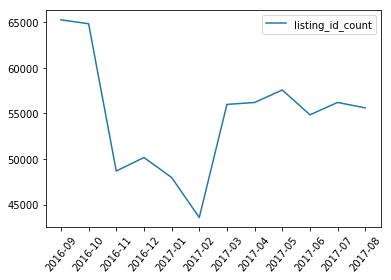

In [36]:
# 添加month列，用于统计每个月的入住量
raw_data_calendar['month'] = raw_data_calendar['date'].apply(lambda x: x[:7])

# 因2017年9月数据只到5号，所以剔除
data_calendar_1 = raw_data_calendar[raw_data_calendar['month']!='2017-09']

# 按月份统计入住人数
data_calendar_2 = data_calendar_1[data_calendar_1['available']=='f'][['listing_id', 'month']].groupby('month').count()

#data_calendar_2.rename(columns={"listing_id":"listing_id_count"}).style.bar(subset=['listing_id_count'], align='mid', color=['#d65f5f'])

df = data_calendar_2.rename(columns={"listing_id":"listing_id_count"}).reset_index()
ax = df.plot(xticks=df.index)
ax.set_xticklabels(df["month"])
plt.xticks(rotation=50)

## 2.3、 问题2：什么样的店铺入住率高？

In [37]:
# 查看自变量（类别变量）和因变量之间关系的函数
def fea_relation(df, x_fea, y_fea):
    val_count_df = pd.DataFrame(df[x_fea].value_counts())
    groupby_df = df[[x_fea, y_fea]].groupby(x_fea).mean()
    return pd.merge(val_count_df, groupby_df, left_index=True, right_index=True).sort_values(by=y_fea, ascending=False)\
                            #.style.bar(subset=[y_fea], align='mid', color=['#d65f5f', '#5fba7d'])

In [ ]:
fea_relation(listing_preprocess_df_5, 'host_response_time', 'occupied_ratio')

In [ ]:
fea_relation(listing_preprocess_df_5, 'host_is_superhost', 'occupied_ratio')

In [51]:
# 编码后的类别特征+处理后的日期数据+处理后的价格和比率数据+目标值
cate_fea = list(get_dummied_df.columns)
date_fea = ['host_since', 'first_review', 'last_review']
rate_and_price_fea = ['host_response_rate',
                        'cleaning_fee',
                        'host_acceptance_rate',
                        'price',
                        'weekly_price',
                        'monthly_price',
                        'security_deposit',
                        'extra_people']
availability_fea = ['availability_30','availability_60','availability_90', 'availability_365']

# 入模变量+目标变量
fea_lis = cate_fea + date_fea + rate_and_price_fea #+ availability_fea
#fea_lis = rate_and_price_fea
obj_lis = ['reviews_per_month', 'number_of_reviews','occupied_ratio','review_scores_value']

fea_data = listing_preprocess_df_6[fea_lis]
obj_data = listing_preprocess_df_6[obj_lis]

In [49]:
X_train.isna().sum()

host_response_time_a few days or more       0
host_response_time_within a day             0
host_response_time_within a few hours       0
host_response_time_within an hour           0
host_is_superhost_f                         0
host_is_superhost_t                         0
host_has_profile_pic_f                      0
host_has_profile_pic_t                      0
host_identity_verified_f                    0
host_identity_verified_t                    0
market_Boston                               0
market_Other (Domestic)                     0
market_San Francisco                        0
is_location_exact_f                         0
is_location_exact_t                         0
room_type_Entire home/apt                   0
room_type_Private room                      0
room_type_Shared room                       0
bed_type_Airbed                             0
bed_type_Couch                              0
bed_type_Futon                              0
bed_type_Pull-out Sofa            

In [52]:
# 用随机森林回归，分析入住率与特征之间的关系
test_size = .2
random_state = 10


#split the data into train and test
#X_train, X_test, y_train, y_test = train_test_split(fea_data, obj_data['number_of_reviews'], test_size = test_size, random_state=random_state)
X_train, X_test, y_train, y_test = train_test_split(fea_data, obj_data['occupied_ratio'], test_size = test_size, random_state=random_state)

#fit the model and obtain pred response
#model_reg = LinearRegression(normalize=True)
model_reg = RandomForestRegressor(max_depth=10,random_state=random_state,n_estimators=100, min_samples_leaf=3)
model_reg.fit(X_train, y_train)
y_test_preds = model_reg.predict(X_test)
y_train_preds = model_reg.predict(X_train)

print(r2_score(y_test, y_test_preds), r2_score(y_train, y_train_preds))
print(mean_squared_error(y_test, y_test_preds), mean_squared_error(y_train, y_train_preds))

0.3023584829967847 0.6712407421910539
0.015264232949736126 0.007224419905194573


In [ ]:
pd.Series(model_reg.feature_importances_, index=fea_data.columns).sort_values(ascending=False)

## 2.4、 问题3：什么样的店铺最令顾客满意（评分高）？

In [ ]:
fea_relation(listing_preprocess_df_5, 'host_response_time', 'review_scores_value')

In [ ]:
fea_relation(listing_preprocess_df_3, 'bedrooms', 'review_scores_value')

In [ ]:
fea_relation(listing_preprocess_df_3, 'host_identity_verified', 'review_scores_value')

In [53]:
X_train, X_test, y_train, y_test = train_test_split(fea_data, obj_data['review_scores_value'],\
                                                    test_size = test_size,\
                                                    random_state=random_state)
model_clf = GradientBoostingClassifier(n_estimators=50,\
                                       learning_rate=0.2,\
                                       max_depth=5,\
                                       random_state=random_state,\
                                       min_samples_leaf=10).fit(X_train, y_train)
model_clf.score(X_test, y_test), model_clf.score(X_train, y_train)

(0.5693160813308688, 0.9468085106382979)

### 筛选建模特征

In [232]:
model_clf.score(X_train, y_train)

0.9095139607032058

In [62]:
lm_model.coef_

array([ 1.67443422e+00,  1.35116853e+00,  1.07868623e+00,  1.67858216e+00,
        3.40812026e+13,  3.40812026e+13, -2.21807141e+13, -2.21807141e+13,
        1.89756093e+13,  1.89756093e+13, -4.53431263e+00, -2.45709214e+14,
       -2.23754245e+00,  1.21340940e+14,  1.21340940e+14, -2.03623903e+13,
       -2.03623903e+13, -2.03623903e+13,  1.36690026e+14,  1.36690026e+14,
        1.36690026e+14,  1.36690026e+14,  1.36690026e+14,  2.76848468e+13,
        2.76848468e+13,  8.43880227e+13,  8.43880227e+13,  8.43880227e+13,
        8.43880227e+13,  1.97276436e+14,  1.97276436e+14,  5.03930030e+12,
        5.03930030e+12, -7.08776675e-04,  2.63543260e-06, -3.11782234e-03,
        7.38577747e-03, -4.43362959e-03,  8.93897872e-03, -2.86126535e-02,
        4.20075798e-03, -1.64207995e-04,  5.77496015e-04, -3.79353552e-03])

### 看变量之间的关系

In [120]:
from collections import defaultdict

def total_count(df, col1, col2, look_for):
    '''
    INPUT:
    df - the pandas dataframe you want to search
    col1 - the column name you want to look through
    col2 - the column you want to count values from
    look_for - a list of strings you want to search for in each row of df[col]

    OUTPUT:
    new_df - a dataframe of each look_for with the count of how often it shows up
    '''
    new_df = defaultdict(int)
    #loop through list of ed types
    for val in look_for:
        #loop through rows
        for idx in range(df.shape[0]):
            #if the ed type is in the row add 1
            if val in df[col1][idx]:
                new_df[val] += int(df[col2][idx])
    new_df = pd.DataFrame(pd.Series(new_df)).reset_index()
    new_df.columns = [col1, col2]
    new_df.sort_values('count', ascending=False, inplace=True)
    return new_df

In [ ]:
def clean_and_plot(df, title='Method of Educating Suggested', plot=True):
    '''
    INPUT 
        df - a dataframe holding the CousinEducation column
        title - string the title of your plot
        axis - axis object
        plot - bool providing whether or not you want a plot back
        
    OUTPUT
        study_df - a dataframe with the count of how many individuals
        Displays a plot of pretty things related to the CousinEducation column.
    '''
    study = df['CousinEducation'].value_counts().reset_index()
    study.rename(columns={'index': 'method', 'CousinEducation': 'count'}, inplace=True)
    study_df = t.total_count(study, 'method', 'count', possible_vals)

    study_df.set_index('method', inplace=True)
    if plot:
        (study_df/study_df.sum()).plot(kind='bar', legend=None);
        plt.title(title);
        plt.show()
    props_study_df = study_df/study_df.sum()
    return props_study_df

In [ ]:
ed_1 = df[df['HigherEd'] == 1] # Subset df to only those with HigherEd of 1
ed_0 = df[df['HigherEd'] == 0] # Subset df to only those with HigherEd of 0

In [121]:
ed_1_perc = clean_and_plot(ed_1, 'Higher Formal Education', plot=False)
ed_0_perc = clean_and_plot(ed_0, 'Max of Bachelors Higher Ed', plot=False)

comp_df = pd.merge(ed_1_perc, ed_0_perc, left_index=True, right_index=True)
comp_df.columns = ['ed_1_perc', 'ed_0_perc']
comp_df['Diff_HigherEd_Vals'] = comp_df['ed_1_perc'] - comp_df['ed_0_perc']
comp_df.style.bar(subset=['Diff_HigherEd_Vals'], align='mid', color=['#d65f5f', '#5fba7d'])

In [122]:
d

defaultdict(list, {})